In [1]:
# preambles
import networkx as nx
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# load pickled network file
pickle_name = 'adj_mx.pkl'
pickle_dir = r"C:\FILES\thesis-vsc-files\github\undergrad-thesis\dcrnn\data\sensor_graph"
hk_network = pickle.load(open(pickle_dir + os.sep + pickle_name, "rb"))
print("loaded hk network from", pickle_dir + os.sep + pickle_name)

loaded hk network from C:\FILES\thesis-vsc-files\github\undergrad-thesis\dcrnn\data\sensor_graph\adj_mx.pkl


In [3]:
# adjacency matrix
adj_nodes = hk_network[2]

subadj_nodes = adj_nodes[0:50,0:50]

In [4]:
# node positions
node_info = pd.read_csv(r"C:\FILES\thesis-vsc-files\github\undergrad-thesis\dcrnn\data\sensor_graph\graph_sensor_locations.csv")

latitude = node_info['latitude']
longitude = node_info['longitude']

node_position = []  # Initialize node_position as an empty list
node_position_s = []

for i in range(1,208):
    node_position.append((longitude[i-1], latitude[i-1]))

for i in range(1,51):
    node_position_s.append((longitude[i-1], latitude[i-1]))


In [5]:
#create graph
hk_graph = nx.Graph(name='Los Angeles Map')
hk_subgraph = nx.Graph(name='Los Angeles Submap')

for adj_matrix in adj_nodes:
    hk_graph.add_edges_from([(i, j) for i in range(len(adj_nodes)) for j in range(len(adj_nodes)) if adj_nodes[i][j] > 0 and adj_nodes[i][j] < 1])

for adj_matrix_i in subadj_nodes:
    hk_subgraph.add_edges_from([(i, j) for i in range(len(subadj_nodes)) for j in range(len(subadj_nodes)) if subadj_nodes[i][j] > 0 and subadj_nodes[i][j] < 1])


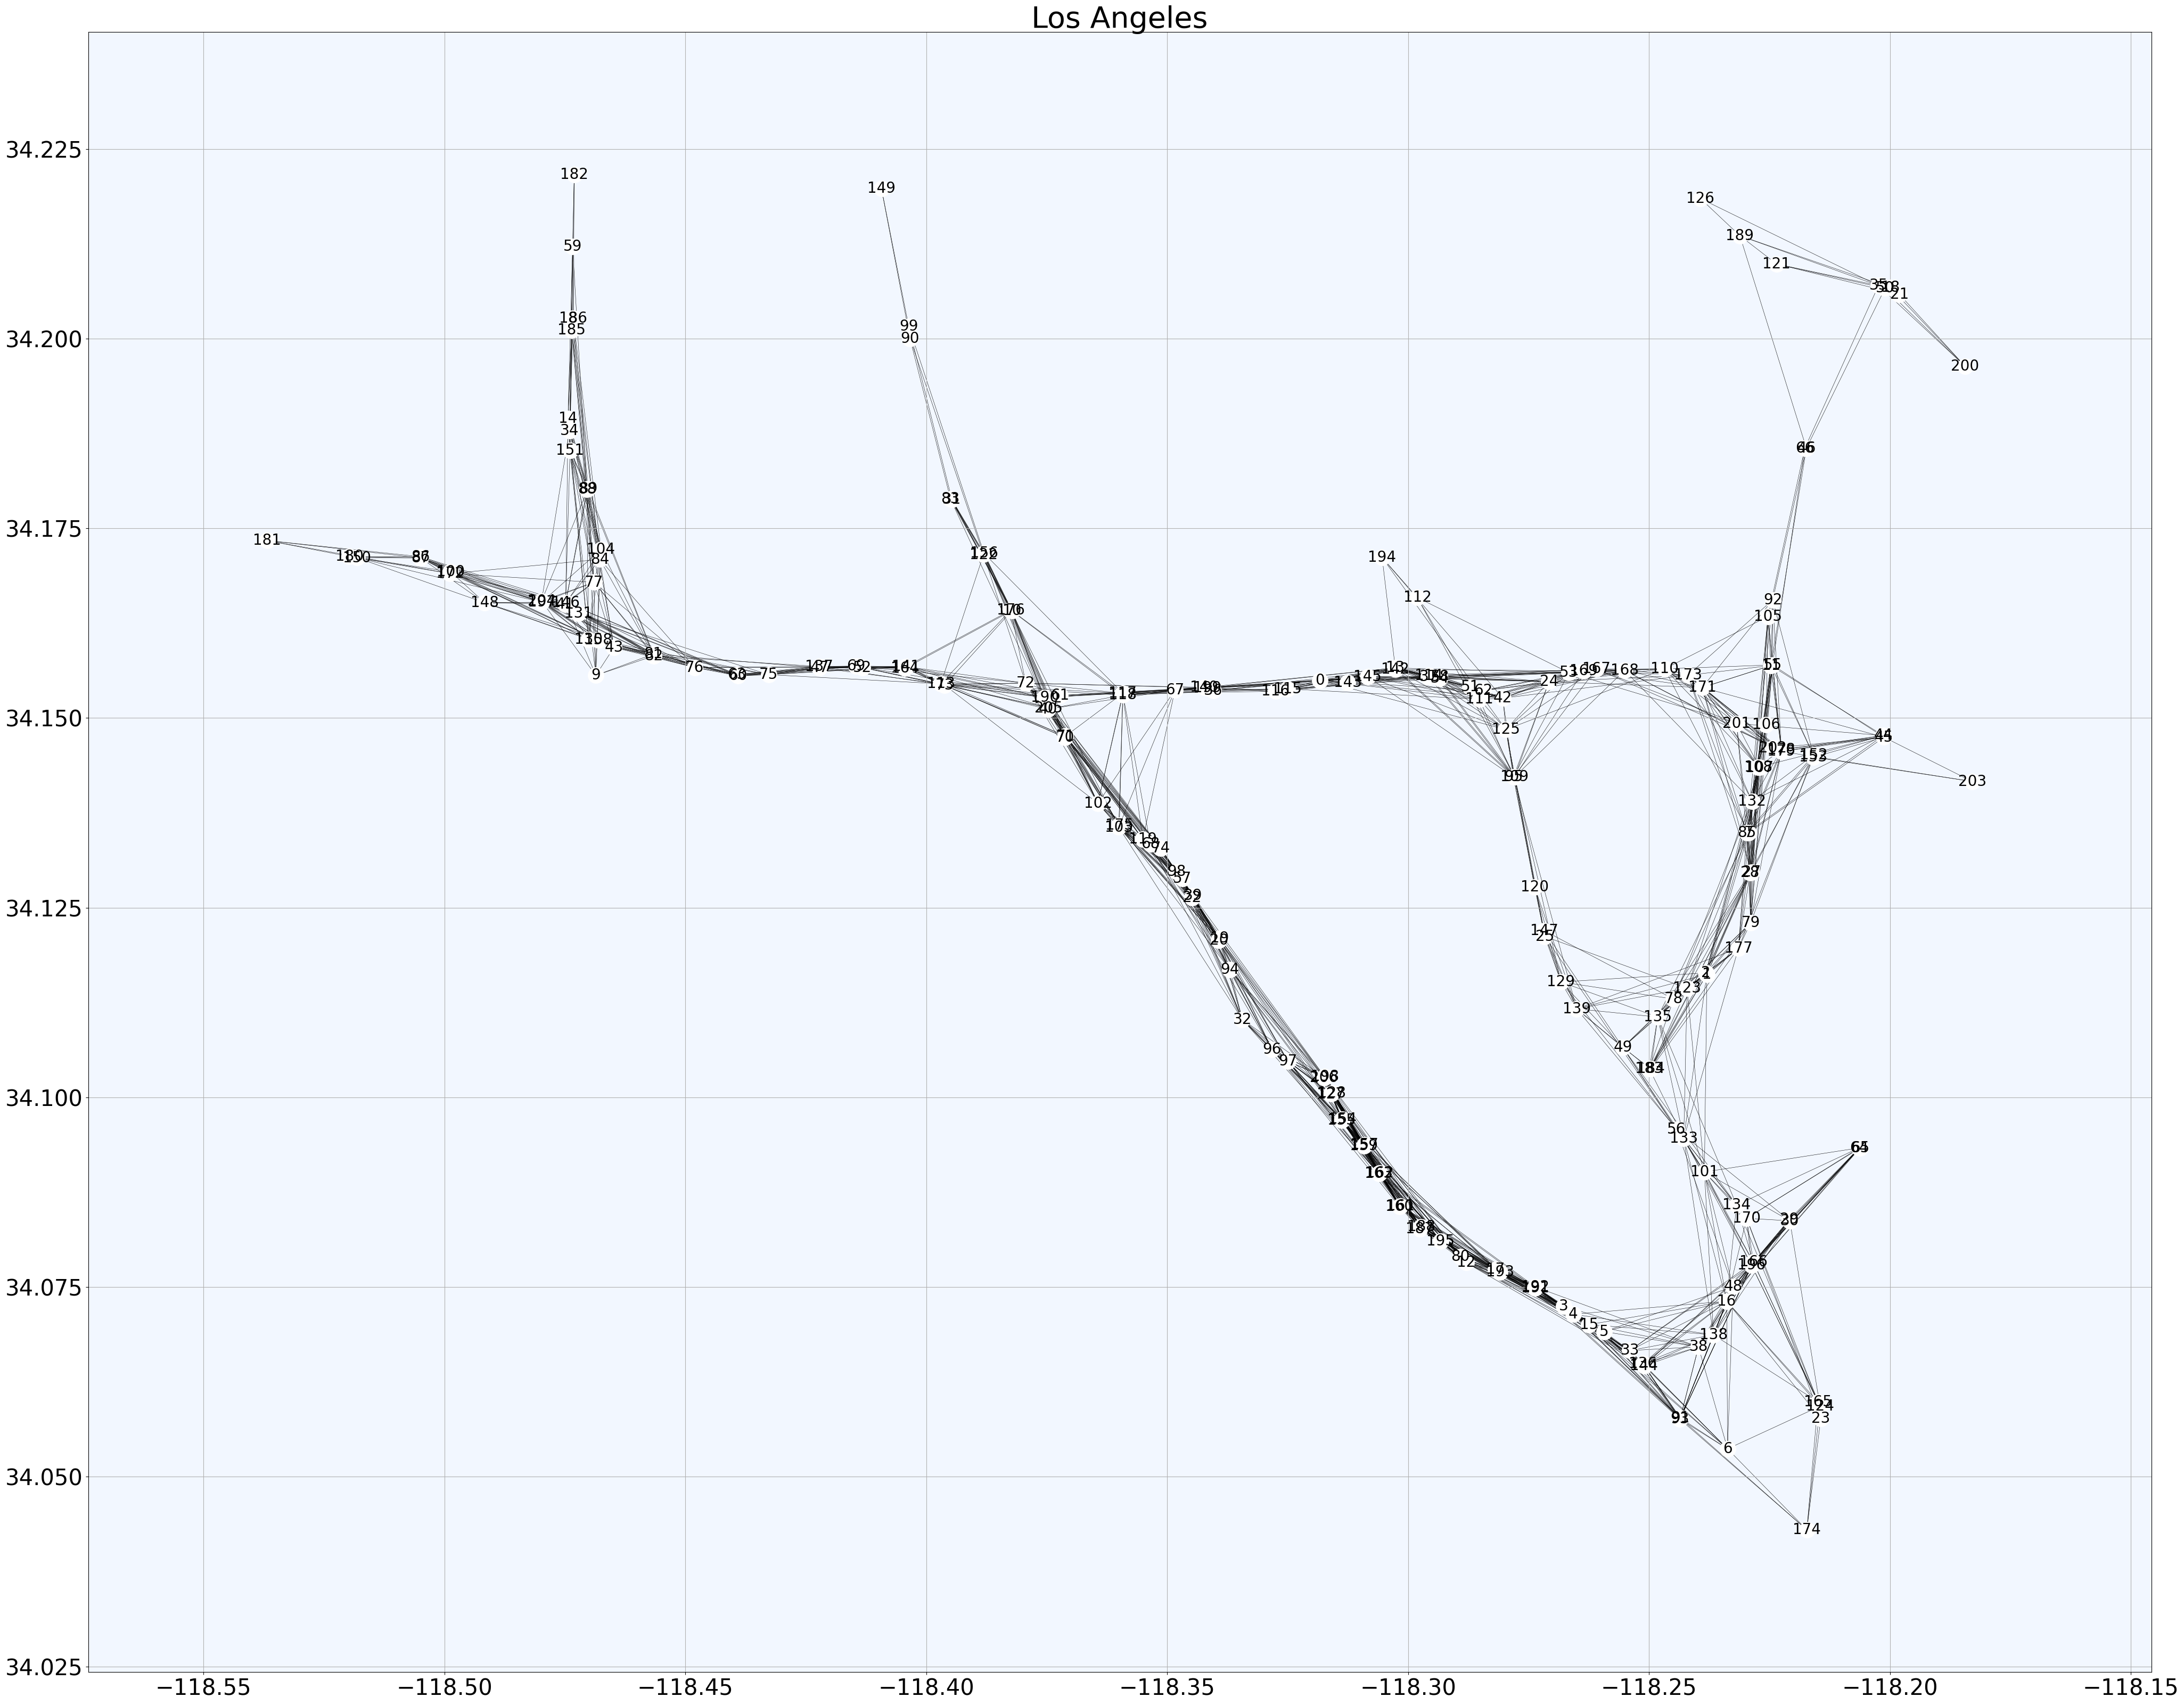

In [8]:
fig, ax = plt.subplots(figsize=(50,40))  # Adjust the figure size as needed
plt.gca().set_facecolor('#f2f7ff')  # Adjust the figure size as needed

nx.draw_networkx(hk_graph, width=0.4, pos=node_position, with_labels=True, node_color='white', node_size=450, font_size=20, ax=ax)
# nx.draw_networkx(hk_subgraph, width=0.6, pos=node_position_s, with_labels=True, node_color='black', node_size=450,font_color='white', font_size=16, ax=ax)

# plt.xlabel('Longitude', fontsize=40)
# plt.ylabel('Latitude', fontsize=40)

ax.set_axis_on()
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, labelsize=30)
# ax.set_yticklabels(latitude[9:207:10], fontsize=30)
# ax.set_xticklabels(longitude[9:207:10], fontsize=30)
plt.title('Los Angeles', fontsize=40)
plt.grid('on')
plt.show()